In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import datasets, model_selection
from tensorflow.keras.backend import one_hot
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

### MNIST Fashion 이미지셋 불러오기

In [ ]:
(train_images, train_labels),(test_images,test_labels) = load_data()

In [ ]:
class_names = []

In [ ]:
train_images.shape

In [ ]:
train_labels.shape

### 7.나이,성별,운임(fare),등급(class)에 따른 생사를 예측하시오.( train, test 구분하고, 정확도 측정결과도 출력해야함)

#### 데이터셋 전처리

In [6]:
titanic = sns.load_dataset("titanic")

In [7]:
avg_age = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna( avg_age )
# age_slice = titanic["age"].copy()
# age_slice[np.isnan(age_slice)] = avg_age
# age_slice

In [8]:
titanic['age'].isnull().sum()

0

In [9]:
titanic.loc[titanic["sex"] == "male", "Sex_encode"] = 0
titanic.loc[titanic["sex"] == "female", "Sex_encode"] = 1

In [10]:
titanic.loc[titanic["class"] == "Third", "Class_encode"] = 3
titanic.loc[titanic["class"] == "Second", "Class_encode"] = 2
titanic.loc[titanic["class"] == "First", "Class_encode"] = 1

In [11]:
xdata = titanic[['age','Sex_encode','fare','Class_encode']]
ydata = titanic[['survived']]

In [12]:
xdata

,age,Sex_encode,fare,Class_encode
0,22.000000,0.0,7.2500,3.0
1,38.000000,1.0,71.2833,1.0
2,26.000000,1.0,7.9250,3.0
3,35.000000,1.0,53.1000,1.0
4,35.000000,0.0,8.0500,3.0
...,...,...,...,...
886,27.000000,0.0,13.0000,2.0
887,19.000000,1.0,30.0000,1.0
888,29.699118,1.0,23.4500,3.0
889,26.000000,0.0,30.0000,1.0


In [13]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(xdata, ydata, test_size = 0.3)

In [14]:
x_train

,age,Sex_encode,fare,Class_encode
373,22.000000,0.0,135.6333,1.0
36,29.699118,0.0,7.2292,3.0
307,17.000000,1.0,108.9000,1.0
459,29.699118,0.0,7.7500,3.0
682,20.000000,0.0,9.2250,3.0
...,...,...,...,...
556,48.000000,1.0,39.6000,1.0
677,18.000000,1.0,9.8417,3.0
296,23.500000,0.0,7.2292,3.0
475,29.699118,0.0,52.0000,1.0


In [15]:
y_train

,survived
373,0
36,1
307,1
459,0
682,0
...,...
556,1
677,1
296,0
475,0


# Tensor

In [16]:
x = tf.placeholder( tf.float32, [None,4])
y = tf.constant(y_train,tf.float32)

In [17]:
w1 = tf.get_variable('w1',[4,1],initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable('b1',[1],initializer = tf.contrib.layers.xavier_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [35]:
z1 = tf.matmul(x,w1) + b1
hx = tf.nn.sigmoid(z1)

In [36]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = z1 , labels =y)
cost = tf.reduce_mean(cost_i)

In [37]:
optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [38]:
for i in range(10001):
    sess.run( train, {x:x_train})
    if i%100 == 0 :
        print( i, sess.run(cost, {x:x_train}))

0 0.0
100 0.0
200 0.0
300 0.0
400 0.0
500 0.0
600 0.0
700 0.0
800 0.0
900 0.0
1000 0.0
1100 0.0
1200 0.0
1300 0.0
1400 0.0
1500 0.0
1600 0.0
1700 0.0
1800 0.0
1900 0.0
2000 0.0
2100 0.0
2200 0.0
2300 0.0
2400 0.0
2500 0.0
2600 0.0
2700 0.0
2800 0.0
2900 0.0
3000 0.0
3100 0.0
3200 0.0
3300 0.0
3400 0.0
3500 0.0
3600 0.0
3700 0.0
3800 0.0
3900 0.0
4000 0.0
4100 0.0
4200 0.0
4300 0.0
4400 0.0
4500 0.0
4600 0.0
4700 0.0
4800 0.0
4900 0.0
5000 0.0
5100 0.0
5200 0.0
5300 0.0
5400 0.0
5500 0.0
5600 0.0
5700 0.0
5800 0.0
5900 0.0
6000 0.0
6100 0.0
6200 0.0
6300 0.0
6400 0.0
6500 0.0
6600 0.0
6700 0.0
6800 0.0
6900 0.0
7000 0.0
7100 0.0
7200 0.0
7300 0.0
7400 0.0
7500 0.0
7600 0.0
7700 0.0
7800 0.0
7900 0.0
8000 0.0
8100 0.0
8200 0.0
8300 0.0
8400 0.0
8500 0.0
8600 0.0
8700 0.0
8800 0.0
8900 0.0
9000 0.0
9100 0.0
9200 0.0
9300 0.0
9400 0.0
9500 0.0
9600 0.0
9700 0.0
9800 0.0
9900 0.0
10000 0.0


In [42]:
val = sess.run(hx, {x:x_test})

In [44]:
(val == y_test).mean()

survived    0.615672
dtype: float64

# Keras

In [45]:
model = Sequential()
model.add(Dense(units =1 , input_dim=4 ,activation = 'sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [46]:
model.compile(loss = 'binary_crossentropy', optimizer = "Adam" ,metrics = ['accuracy'])  #optimizer = "adam" 으로 설정하면 xavier 초기화
h= model.fit(x_train,y_train,epochs=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 623 samples
Epoch 1/1000
623/623 [==============================] - 0s 152us/sample - loss: 10.5411 - acc: 0.3836
Epoch 2/1000
623/623 [==============================] - 0s 31us/sample - loss: 9.8523 - acc: 0.3836
Epoch 3/1000
623/623 [==============================] - 0s 40us/sample - loss: 9.1611 - acc: 0.3836
Epoch 4/1000
623/623 [==============================] - 0s 35us/sample - loss: 8.4739 - acc: 0.3836
Epoch 5/1000
623/623 [==============================] - 0s 35us/sample - loss: 7.7907 - acc: 0.3836
Epoch 6/1000
623/623 [==============================] - 0s 36us/sample - loss: 7.1059 - acc: 0.3836
Epoch 7/1000
623/623 [==============================] - 0s 35us/sample - loss: 6.4206 - acc: 0.3836
Epoch 8/1000
623/623 [==============================] - 0s 32us/sample - loss: 5.7493 - acc: 0.3820
Epoch 9/1000
623/623 [==============================] - 0s 32us/sample - loss: 5.06

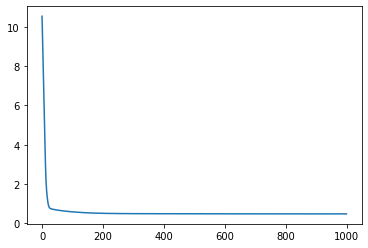

In [47]:
plt.plot(h.history['loss'])
plt.show()

In [48]:
h.history['acc'][-1]

0.7849117